In [1]:
using Plots
using Gen

In [2]:
x = range(20, 100, length=100)
y=range(0,stop=0.0,length=100)
#y = range(0,100, length=100)
z=range(0,stop=0.0,length=100)

0.0:0.0:0.0

In [3]:
x_lim = 200
y_lim = 200
z_lim = 10

10

In [4]:
@gen function rail_model_new(xstart::Float64, xend::Float64)
    #n = length(xs)
    xstart = @trace(normal(xstart, 1), :xstart)
    xend = @trace(normal(xend,1), :xend)
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 1), :intercept)
    
    xcamera = @trace(normal(50., 10), :xcamera)
    ycamera = @trace(normal(50., 10), :ycamera)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    #for (i, x) in enumerate(xs)
     #   @trace(normal(slope * x + intercept, 0.1), (:r1, i))
      #  @trace(normal(slope * x + intercept+2, 0.1), (:r2, i))
    #end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return 1
end;

In [28]:
function render_trace(trace)
    
    # Pull out xs from the trace
    #xs = get_args(trace)[1]
    
    #xmin = minimum(xs)
    #xmax = maximum(xs)
    #y_r1 = [trace[(:r1, i)] for i=1:length(xs)]
    #y_r2 = [trace[(:r2, i)] for i=1:length(xs)]
    xs = [trace[:xstart],trace[:xend] ]
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    z =range(0.,stop=0.0,length=length(xs))
    # Draw the line
    p = plot([xs, xs], [((xs.*slope) .+intercept), ((xs .* slope) .+ intercept .+ 2)] , [z, z],
        camera=(trace[:xcamera], trace[:ycamera]), legend=false)
        #xlim = (0, x_lim),
        #ylim = (0, y_lim),
        #zlim = (0, z_lim))
    return p
end;

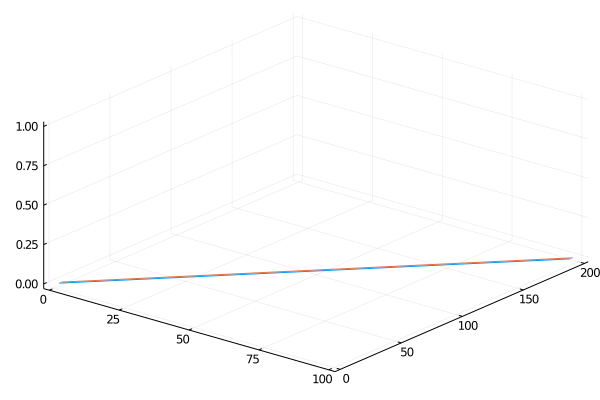

In [6]:
trace1 = Gen.simulate(rail_model_new, (0.0,100.,));
p = render_trace(trace1);
p

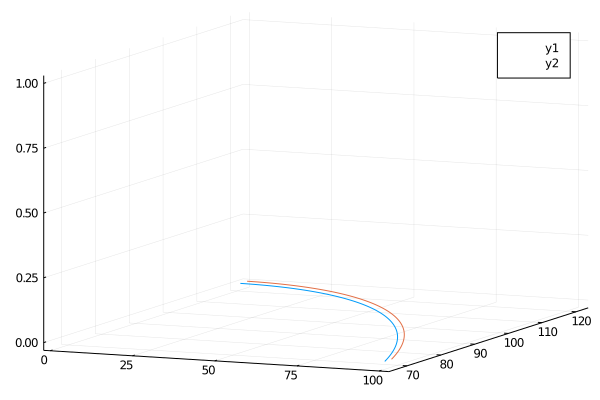

In [7]:
x = range(1., 100., length=100)
z = range(0., 0., length=100)
r= 120.
f = sqrt.(r^2 .- (x .^ 2))
g = sqrt.(r^2 .- (x .^ 2))
plot3d([x, x],[f, f .+ 2] , [z, z],
#xlim = (0, 100),
 #   ylim = (0, 100),
  #  zlim = (0, 10),
    camera=(30,30))

In [8]:
@gen function rail_curve(xstart::Float64, xend::Float64, radius::Float64)
    #n = length(xs)
    xs = @trace(normal(xstart, 1), :xstart)
    xe = @trace(normal(xend,1), :xend)
    slope = @trace(normal(0, 1), :slope)
    yradius = @trace(normal(radius, 1), :yradius)
    xcamera = @trace(normal(50., 10), :xcamera)
    ycamera = @trace(normal(50., 10), :ycamera)
    #xs = @trace((range(xs, xe, length=10)), :x)

    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return 1
end;

In [27]:
function render_trace_curves(trace)
    
    # Pull out xs from the trace
    #xs = get_args(trace)[1]
    
    #xmin = minimum(xs)
    #xmax = maximum(xs)
    #y_r1 = [trace[(:r1, i)] for i=1:length(xs)]
    #y_r2 = [trace[(:r2, i)] for i=1:length(xs)]
    x = range(trace[:xstart], trace[:xend], length=10)
    # Pull out slope and intercept from the trace
    z =range(0.,stop=0.0,length=length(x))
    # Draw the line
    f = (sqrt.(trace[:yradius]^2 .- (x .^ 2))) .* trace[:slope]
    p = plot([x, x], [f, f .+ 2] , [z, z],
        camera=(trace[:xcamera], trace[:ycamera]), legend=false)
        #xlim = (0, x_lim),
        #ylim = (0, y_lim),
        #zlim = (0, z_lim))
    return p
end;

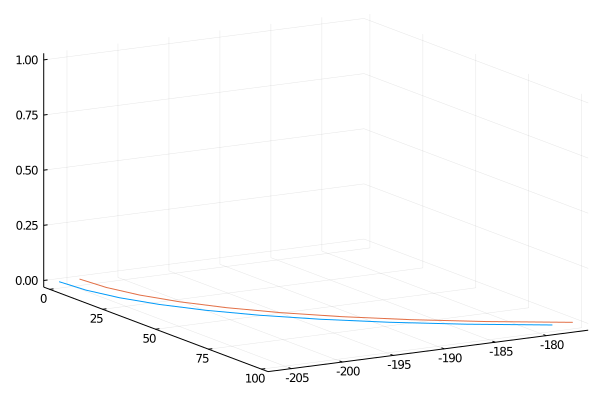

In [10]:
trace1 = Gen.simulate(rail_curve, (0.0, 100., 200.,));
p = render_trace_curves(trace1);
p

In [11]:
@gen function combined_model(xstart::Float64, xend::Float64, radius::Float64)
    if @trace(bernoulli(0.5), :is_line)
        @trace(rail_model_new(xstart, xend))
    else
        @trace(rail_curve(xstart, xend, radius))
    end
end;

function render_combined(trace)
    if trace[:is_line]
        render_trace(trace)
    else
        render_trace_curves(trace)
    end
end;

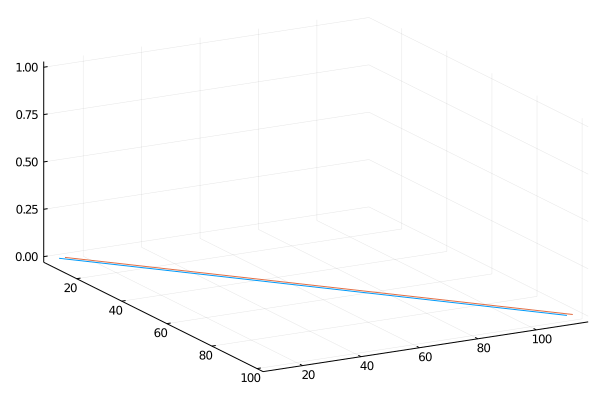

In [12]:
trace = Gen.simulate(combined_model, (10., 100., 150.,));
p = render_combined(trace);
p

In [13]:
x = range(1., 100., length=100)
z = range(0., 0., length=100)
r= 120.



120.0

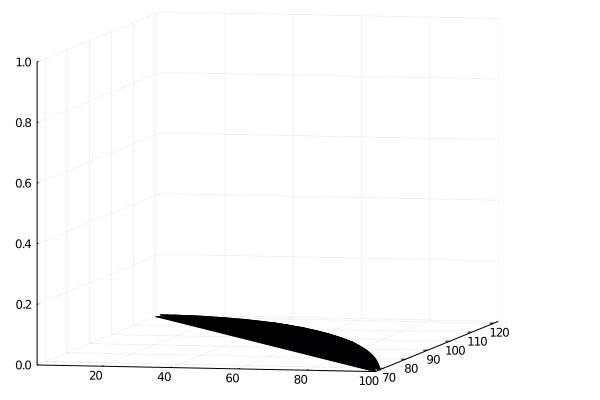

GKS: Possible loss of precision in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
origin outside current window


In [14]:
plot([x, x], [(sqrt.(r^2 .- (x .^ 2))) , (sqrt.(r^2 .- (x .^ 2)) .+2)], [z, z], st=:surface, camera=(20, 20)) 

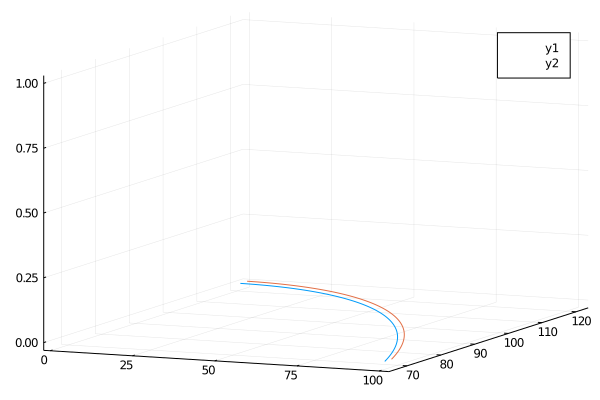

In [15]:
plot([x, x], [(sqrt.(r^2 .- (x .^ 2))) , (sqrt.(r^2 .- (x .^ 2)) .+2)], [z, z])


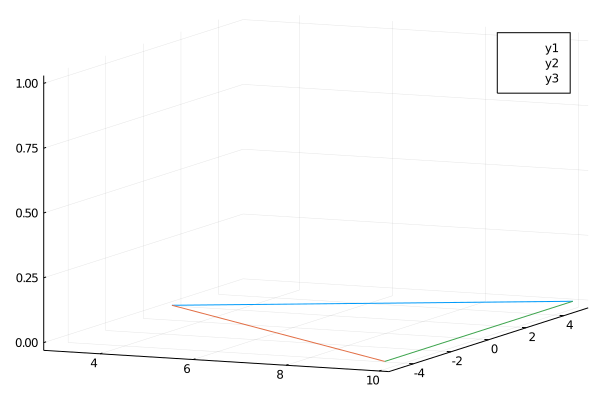

In [16]:
x_square = range(20., 40., length=2)
z_square = range(0., 0., length=2)
plot([10,3],[5, 1] ,[0,0])
plot!([10,3],[-5, 1] ,[0,0])
plot!([10,10],[5,-5] ,[0,0])

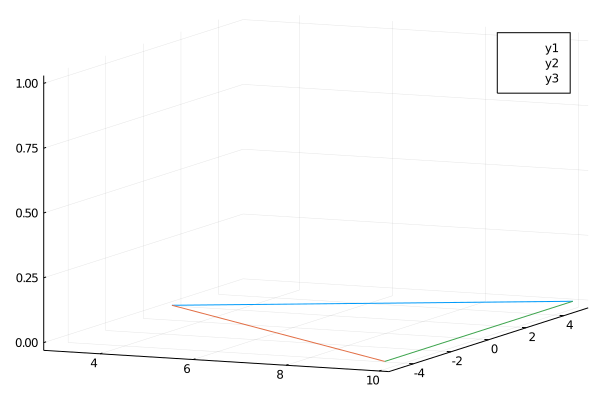

In [17]:
plot([[10,3],[10,3],[10,10]],[[5, 1], [-5,1], [5, -5]], [[0,0],[0,0],[0,0]] )

In [18]:
function render_triangle(xstart, ystart, xend, yend, dist)
   p = plot([xstart, xend], [ystart, yend], [0,0], camera=(20,60),  c=1, legend=false)
   p = plot!([xstart, xend], [(ystart - dist), yend], [0, 0], c=1)
   p = plot!([xstart, xstart], [ystart, (ystart-dist)], [0,0], c=1)
    return p
end;

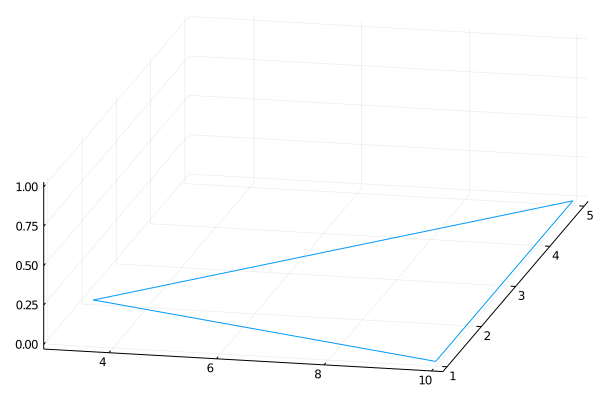

In [19]:
render_triangle(10, 5, 3, 2, 4)

In [60]:
@gen function triangle_sim(xstart::Float64, xend::Float64, ystart::Float64, yend::Float64, dist::Float64)
    #n = length(xs)
    xs = @trace(normal(xstart, 1), :xstart)
    xe = @trace(normal(xend,1), :xend)
    ys = @trace(normal(ystart, 1), :ystart)
    ye = @trace(normal(yend,1), :yend)
    d = @trace(normal(dist,1), :dist)
    return 1
end;

function render_triangle(trace)
   p = plot!([trace[:xstart], trace[:xend]], [trace[:ystart], trace[:yend]], [0,0],  c=1, legend=false)
   p = plot!([trace[:xstart], trace[:xend]], [(trace[:ystart] - trace[:dist]), trace[:yend]], [0, 0], c=1)
   p = plot!([trace[:xstart], trace[:xstart]], [trace[:ystart], (trace[:ystart]-trace[:dist])], [0,0], c=1)
    return p
end;

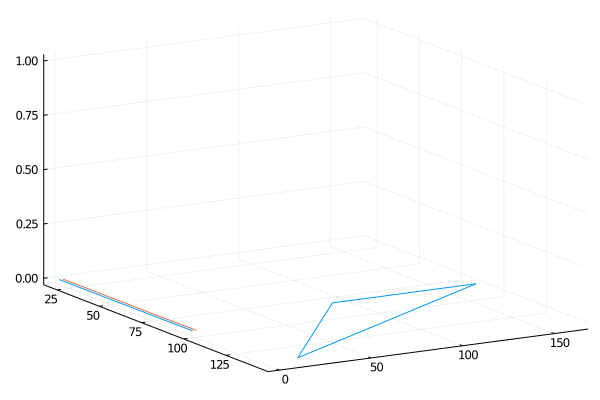

In [63]:
trace = Gen.simulate(combined_model, (20., 100., 150.,));
p = render_combined(trace);
trace2 = Gen.simulate(triangle_sim, (rand(1.:200.), rand(1.:200.), rand(1.:200.), rand(1.:200.), rand(1.:200.),));
q = render_triangle(trace2);
plot(p)
plot!(q)

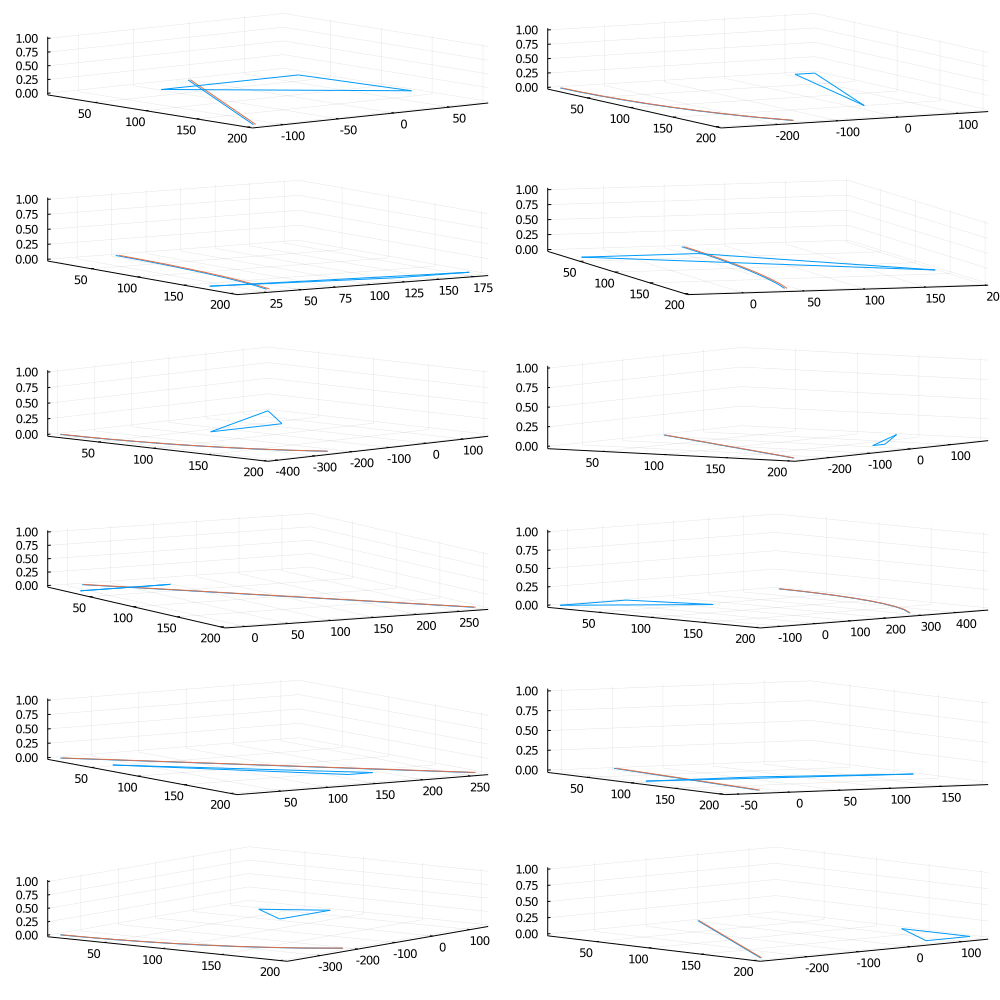

In [67]:
rails = Array{Any}(nothing, 12)
objects = Array{Any}(nothing,12)
traces = [Gen.simulate(combined_model, (10., 200., 250.,)) for _=1:12];
trace2 = [Gen.simulate(triangle_sim, (rand(1.:200.), rand(1.:200.), rand(1.:200.), rand(1.:200.), rand(1.:200.),)) for _=1:12];
for i in 1:12
    p = render_combined(traces[i]);
    q = render_triangle(trace2[i]);
    rails[i] = plot(p)
    rails[i] = plot!(q)
end
#gr()
#gr(size=(1000,1000))
plot3d(rails..., layout=(6,2))